Context:

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? 

300k medical appointments and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. Variable names are self-explanatory

Problem Statement:

Predict someone to no-show an appointment.

Dataset Description:

PatientId - Identification of a patient AppointmentID - Identification of each appointment Gender - Male or Female . Female is the greater proportion; woman takes way more care of their health in comparison to man. 
DataMarcacaoConsulta - The day of the actual appointment, when they have to visit the doctor. 
DataAgendamento - The day someone called or registered the appointment, this is before appointment of course. 
Age - How old is the patient. 
Neighbourhood - Where the appointment takes place. 
Scholarship - Ture or False observation. This is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
Hipertension - True or False 
Diabetes - True or False 
Alcoholism - True or False 
Handcap - True or False 
SMS_received - 1 or more messages sent to the patient 
No-show - True or False

Approach :

Following pointers will be helpful to structure your findings.   

1.	Try and explore the data to check for missing values/erroneous entries and also comment on redundant features and add additional ones, if needed.

2.	It is immediately apparent that some of the column names have typos, so let us clear them up before continuing further, so that we don't have to use alternate spellings every time we need a variable. 

3.	For convenience, convert the AppointmentRegistration and Appointment columns into datetime64 format and the AwaitingTime column into absolute values.

4.	Create a new feature called HourOfTheDay, which will indicate the hour of the day at which the appointment was booked. 

5.	Identify and remove outliers from Age. Explain using an appropriate plot.

6.	Analyse the probability of showing up with respect to different features. Create scatter plot and trend lines to analyse the relation between probability of showing up with respect to age/Houroftheday/awaitingtime. Describe your finding.

7.	Create a bar graph to depict probability of showing up for diabetes, alcoholism, hypertension, TB, smokes, scholarship.

8.	Create separate bar graphs to show the probability of showing up for male and female, day of the week and sms reminder. Describe your interpretation. 

9.	Predict the Show-Up/No-Show status based on the features which show the most variation in probability of showing up. They are:

	Age
	Diabetes
	Alchoholism
	Hypertension
	Smokes
	Scholarship
	Tuberculosis

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
healthind = pd.read_csv('healthcare appointment data.csv')

In [3]:
healthind.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [4]:
healthind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      300000 non-null  int64 
 1   Gender                   300000 non-null  object
 2   AppointmentRegistration  300000 non-null  object
 3   ApointmentData           300000 non-null  object
 4   DayOfTheWeek             300000 non-null  object
 5   Status                   300000 non-null  object
 6   Diabetes                 300000 non-null  int64 
 7   Alcoolism                300000 non-null  int64 
 8   HiperTension             300000 non-null  int64 
 9   Handcap                  300000 non-null  int64 
 10  Smokes                   300000 non-null  int64 
 11  Scholarship              300000 non-null  int64 
 12  Tuberculosis             300000 non-null  int64 
 13  Sms_Reminder             300000 non-null  int64 
 14  AwaitingTime        

In [5]:
healthind.dtypes

Age                         int64
Gender                     object
AppointmentRegistration    object
ApointmentData             object
DayOfTheWeek               object
Status                     object
Diabetes                    int64
Alcoolism                   int64
HiperTension                int64
Handcap                     int64
Smokes                      int64
Scholarship                 int64
Tuberculosis                int64
Sms_Reminder                int64
AwaitingTime                int64
dtype: object

In [6]:
healthind.describe()

,Age,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,37.808017,0.077967,0.025010,0.215890,0.020523,0.052370,0.096897,0.000450,0.574173,-13.841813
std,22.809014,0.268120,0.156156,0.411439,0.155934,0.222772,0.295818,0.021208,0.499826,15.687697
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-398.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000


In [7]:
healthind.shape

(300000, 15)

In [8]:
healthind.isnull().sum()

Age                        0
Gender                     0
AppointmentRegistration    0
ApointmentData             0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alcoolism                  0
HiperTension               0
Handcap                    0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
dtype: int64

In [9]:
healthind.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [10]:
healthind['Gender'].unique()

array(['M', 'F'], dtype=object)

In [11]:
healthind['Age'].describe()

count    300000.000000
mean         37.808017
std          22.809014
min          -2.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         113.000000
Name: Age, dtype: float64

In [12]:
#healthind = healthind.drop('ApointmentData', axis = 1)

In [13]:
#healthind.head()

In [14]:
# Rename columns with typos
healthind = healthind.rename(columns={'ApointmentData': 'AppointmentDate',
                            'HiperTension': 'Hypertension',
                            'Handcap': 'Handicap', 'Alcoolism': 'Alcoholism'})

In [15]:
healthind.head()

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [16]:
healthind['AppointmentRegistration'] = pd.to_datetime(healthind['AppointmentRegistration'])
healthind['AppointmentDate'] = pd.to_datetime(healthind['AppointmentDate'])


In [17]:
# Convert AwaitingTime to absolute values
healthind['AwaitingTime'] = healthind['AwaitingTime'].abs()

In [18]:
healthind.head()

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29
1,24,F,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1
2,4,F,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1
3,5,M,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,Thursday,Show-Up,0,0,0,0,0,0,0,1,15
4,38,M,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6


In [19]:
#create new feature called HourofTheDay
healthind['HourofTheDay'] = healthind['AppointmentRegistration'].dt.hour

In [20]:
healthind.head()

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,HourofTheDay
0,19,M,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,14
1,24,F,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,7
2,4,F,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,12
3,5,M,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,17
4,38,M,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6,15


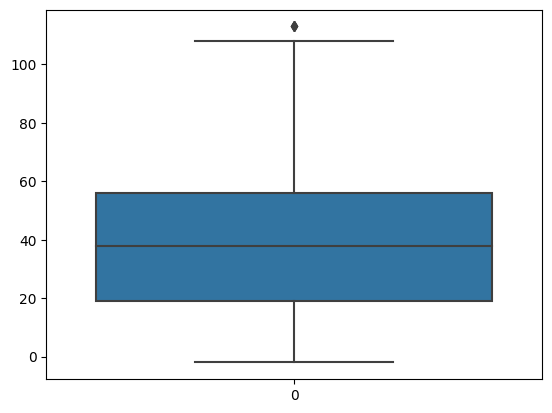

In [21]:
sns.boxplot(healthind['Age'])
plt.show()

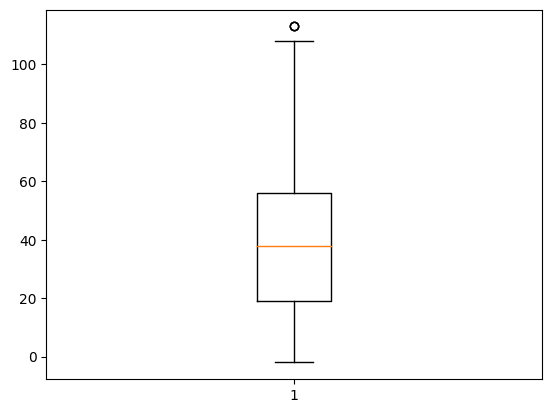

In [22]:
# Identify and remove outliers from Age
age_boxplot = plt.boxplot(healthind['Age'])
age_outliers = [flier.get_ydata() for flier in age_boxplot['fliers']]
age_outliers = [i.tolist() for i in age_outliers]
age_outliers = [y for x in age_outliers for y in x]
healthind = healthind[healthind['Age'].apply(lambda x: x not in age_outliers)]


In [23]:
healthind.head()

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,HourofTheDay
0,19,M,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,14
1,24,F,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,7
2,4,F,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,12
3,5,M,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,17
4,38,M,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6,15


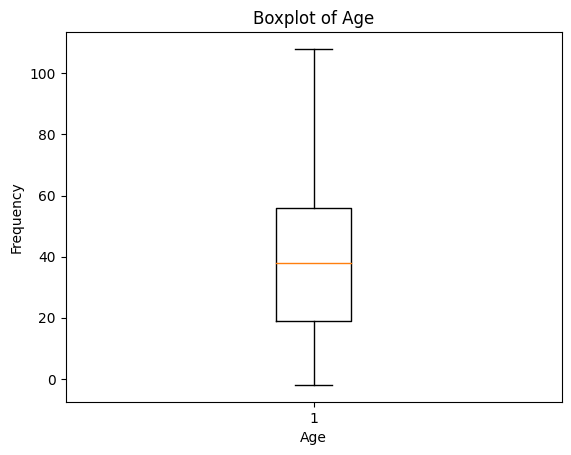

In [24]:
# Create a boxplot for Age
plt.boxplot(healthind['Age'])
# Set the title and axis labels
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [25]:
# Convert Status column to numeric values
healthind['Status'] = healthind['Status'].map({'No-Show': 0, 'Show-Up': 1})

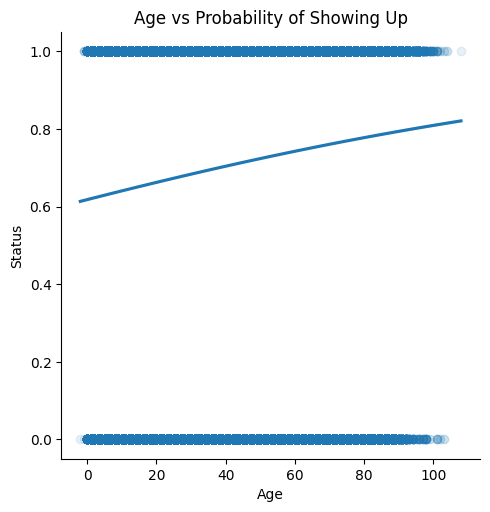

In [26]:
# Create scatter plot with trend line for Age and probability of showing up
sns.lmplot(x='Age', y='Status', data=healthind, logistic=True, scatter_kws={'alpha':0.1})
plt.title('Age vs Probability of Showing Up')
plt.show()


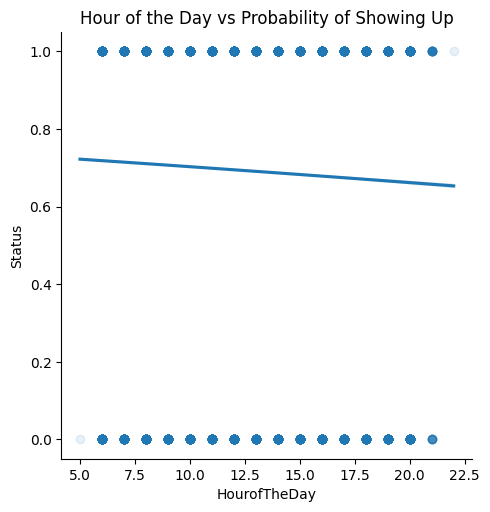

In [27]:
# Create scatter plot with trend line for HourOfTheDay and probability of showing up
sns.lmplot(x='HourofTheDay', y='Status', data=healthind, logistic=True, scatter_kws={'alpha':0.1})
plt.title('Hour of the Day vs Probability of Showing Up')
plt.show()


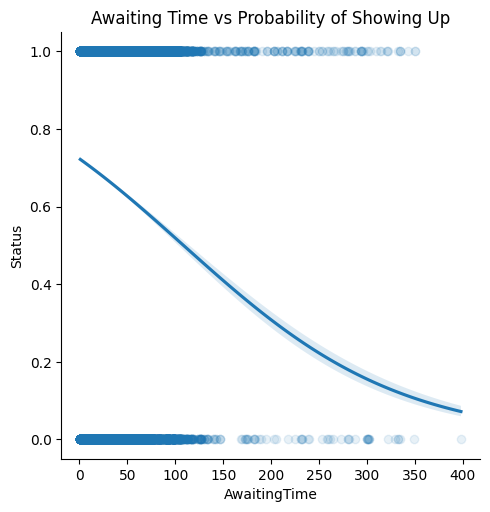

In [28]:
# Create scatter plot with trend line for AwaitingTime and probability of showing up
sns.lmplot(x='AwaitingTime', y='Status', data=healthind, logistic=True, scatter_kws={'alpha':0.1})
plt.title('Awaiting Time vs Probability of Showing Up')
plt.show()

three scatter plots with trend lines to analyze the relationship between probability of showing up and age, hour of the day, and awaiting time. The logistic=True argument in the lmplot function will fit a logistic regression model to the data and plot the logistic regression line. The scatter_kws={'alpha':0.1} argument will set the opacity of the scatter plot points to 0.1 to make it easier to see the trend line.

In [37]:
# Create bar graph to show probability of showing up for diabetes, alcoholism, hypertension, TB, smokes, and scholarship
features = ['Age', 'Diabetes', 'Alcoholism', 'Hypertension', 'Tuberculosis', 'Smokes', 'Scholarship']
probabilities = []

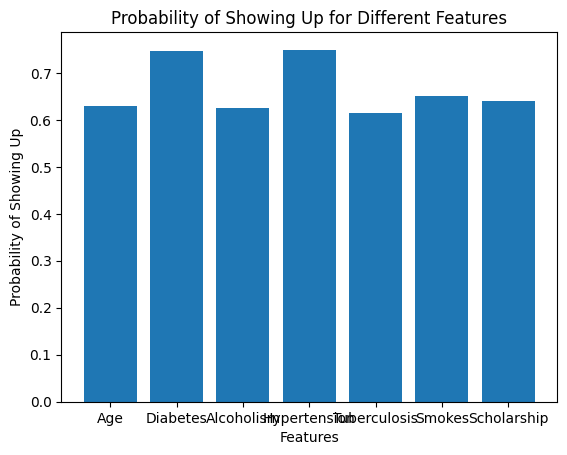

In [38]:
for feature in features:
    probabilities.append(healthind.groupby(feature).mean()['Status'][1])

plt.bar(features, probabilities)
plt.title('Probability of Showing Up for Different Features')
plt.xlabel('Features')
plt.ylabel('Probability of Showing Up')
plt.show()

bar graph to show the probability of showing up for patients with diabetes, alcoholism, hypertension, tuberculosis, smokes, and scholarship. We first create a list of the features we want to analyze, and then loop through each feature to calculate the probability of showing up for patients with that feature. We use the groupby function to group the data by the feature and calculate the mean of the Status column for each group (1 represents "showed up" and 0 represents "no show"). We then plot the features on the x-axis and the probabilities on the y-axis using the bar function. 